This notebook is meant to serve as a brief intro/review of python.  It is nowhere near a complete introduction to the language, but is meant to get you up and going for this course.  Let's start with printing output and receiving input.  First, let's ask a user for their name.

In [ ]:
name = input('What is your name? ')

Now let's print the name the user gave us to the screen.

In [ ]:
print('Hi %s' % (name))

In the example above, the **%s** indicates that it expects to print a string and the value that is substituted there is what is stored in name.  It turns out Joe is a student at UNL.  Thanks to the university's excellent records, we know how old Joe is and his GPA.

In [ ]:
age = 20.4
gpa = 3.257
print('%s\'s gpa is %s. He is %s years old.' % (name,gpa,age))

The above syntax works for any number of arguments, but you need to be careful to pass them in the correct order. Note that the apostrophe in the first word required escaping, i.e. preceding with a forward slash, the character.

Now, we usually don't talk about a person's age as a decimal, so it would be better to print it out in the format we expect.  Turns out we can do this by indicating a floating point or integer value and the desired precision.

In [ ]:
print('%s\'s gpa is %.2f. He is %d years old.' % (name,gpa,age))

That's better. For the second value passed in, the character *f* indicates a floating point value and *.2* tells it to print up to two digits after the decimal point.  For the third value, the character *d* indicates an integer value.  Note that the values of gpa and age were automatically cast to the appropriate type.

There is another syntax that can be used to achieve the same formatting and offers some additional flexibility in the order in which values are passed.

In [ ]:
print('{2}\'s gpa is {0:.2f}. He is {1:.0f} years old'.format(gpa,age,name))

Notice that we printed the age as a floating point number with no digits after the decimal point.  If we try to print it as an integer it does not work here because age contains a decimal point and so it is cast to a float.

In [ ]:
print('{2}\'s gpa is {0:.2f}. He is {1:d} years old'.format(gpa,int(age),name))

You may have noticed that input and print have similar syntax:

**raw_input('some stuff')** --> *prompts user and returns entered value as a string* <br>
**print('some stuff')** --> *writes to the screen 'some stuff'*

Both are of the form:

name(inputs) --> return outputs

They are called functions.  Functions allow us to take a block of code that does some logical set of operations and use it in many places by just calling the function name.  The function takes a set of inputs that the user provides and may return any outputs it produces to the user.  To see how this works, let's write a function that takes a single input, an integer, and returns a Boolean value indicating whether the input integer is prime (True) or not (False).

In [ ]:
import math

def is_prime(n):
    if n < 2: return False
    for factor in range(2,math.ceil(math.sqrt(n))+1):
        if n % factor == 0: return False
    return True

Ok, there are a lot of new ideas introduced here.

The first line above, **import math**, imports the math module.  This makes available to you tools (e.g. variables,functions, new object type) contained in the math module, which are many.  Modules are one reason why python is useful.  There are a large number of modules that provide many tools for scientific computing.

Ok, the next line is *def is_prime(n)*.  The keyword **def** indicates that we're defining a new function.  After **def** we need to provide a unique name for our function, in this case *is_prime*.  Following the function name there is *(input1,...,inputN)*.  Within the parenthesis we define what inputs are to be passed to the function, in this case just one input *n*.  The line should be terminated by *:*.

The function definition, i.e. the code that what we want when the function is called, immediately follows the definition line and is intended.  Here we want to determine if an integer is prime.  For numbers that aren't too big (for computers), we can do this brute force by checking if there is any integer that is a divisor (besides 1 and the number).  We don't have to check all integers, only those less than or equal to the square root of the input number.  We also need to check edge cases, e.g. negative numbers, zero, etc.

When considering different cases as above, for example, we can express it as a sequence of logical decisions, e.g.

```python
if bool_statement_1:
    do this
elif bool_statement_2:
    do that
else:
    do the other
```

The keywords **if**,**elif**,**else** indicate a conditional decision.  The keyword **if** begins a conditional decision making block.  It is generally good practice to end the decision block with an **else** statement, but it isn't strictly necessary as seen above.  You may optionally have one or more **elif** statements between the initiating **if** and terminating **else**.

For our problem, the decision block is something like:

```python
if 0 or negative: return False
elif: has integer divisor: return False
else: return True
```

The real work is done by the next two lines.  The keyword **for** indicates a loop.  The function **range** takes two arguments, a lower bound and an upper bound as integers.  It returns an object called a **list** (actually a range object, but we can cast it to a list, more below).  A list is an ordered sequence of data where each element can be accessed by an index.  If you have experience in languages such as C++ or Java, a list is kind of like an array.  For example

In [ ]:
mylist = list(range(1,10))
print(mylist)
print(mylist[0])
print(mylist[-1])

Ok, back to the for loop.  The line should terminate with a colon.  Lines that follow and are indented are repeated for each iteration of the loop.  In this case, the loop is over the elements of the list returned by the call to the function range and the variable *factor* has the value of that element.

Let's check our is_prime function for a few values: -1,0,2,17, and 146.

In [ ]:
test_vals = [-1,0,2,17,146]
for n in test_vals:
    print('The number {} {} prime.'.format(n,'is' if is_prime(n) else 'is not'))

The function behaves as expected.  As mentioned above, a list is similar to an array in C/C++ or Java.  Elements of the array are stored in sequential order and are accessed by index.

In [ ]:
for index in range(0,len(test_vals)):
    print('{}: {}'.format(index,test_vals[index]))

We can do the same thing as above more efficiently using the **enumerate** function.

In [ ]:
for index,val in enumerate(test_vals):
    print(index,': ',val)

Our simple example above already indicated some of the potential power of lists and loops.  Base python provides a number of useful collections.  Let's explore a few of them here starting with a closer look at lists.

In [ ]:
print(mylist)

# get number of elements in list
print('The list has %d elements.' % (len(mylist)))

# get largest element in list
print('The largest element in the list is %d' % (max(mylist)))

# get smallest element in list
print('The smallest element in the list is %d' % (min(mylist)))

# add an element to the list
mylist.append(10)
print(mylist)

# add a list to another list
mylist2 = list(range(11,20))
print(mylist2)
mylist.extend(mylist2)
print(mylist)

# remove an element from the list
mylist.remove(13)
print(mylist)

Lists can contain any type of object or mix of objects, not just numbers.

In [ ]:
names = ['Kenneth','Evan','Chaitanya','Aniruddha','Joseph','Mason','Alexander','Niko']
print(names)
print(len(names))

# sort names alphabetically
names.sort()
print(names)

# lists can mix objects
names.append(8)
print(names)

# lists of mixed objects can't be sorted by default
try:
    names.sort()
except:
    print('unable to sort list of different types of objects')

Slicing is a powerful feature that allow us to easily index a sub-range of a list.

In [ ]:
# elements of a list can be changed
names[8] = 'Prof Golf'
print(names)
print(names[2:5])
print(names[-6:-3])
print(names[:3])
print(names[-3:])

Also easy to check if a lists contains an element.

In [ ]:
def check_name(name):
    print('%s %s in class' % (name, 'is' if name in names else 'is not'))
    return

check_name('Evan')
check_name('Joe')

**Example 1** Write a function that takes as input an integer *n* and returns a list of prime numbers smaller than *n*.

In [ ]:
def primes(n):
    lop = []
    if n < 2: return lop
    for i in range(2,n):
        if is_prime(i): lop.append(i)
    return lop

In [ ]:
test_values = [-1,0,1,2,7,46,132]
for val in test_values:
    lop = primes(val)
    print(val,': ',', '.join([str(i) for i in lop]))

Can also do this succintly using the **filter** function.

In [ ]:
def primes_filter(n):
    return filter(is_prime,range(n))

for val in test_values:
    lop = primes_filter(val)
    print(val,': ',', '.join([str(i) for i in lop]))

**Example 2** Write a function that takes as input the name of a file and returns a tuple with the number of lines, words, and characters in the file.  Compare with the output of the bash utility wc.  

In [ ]:
def wc(fname):
    with open(fname,'r') as fh:
        lines = fh.readlines()
    fh.close()
    nl = len(lines) # number of lines
    nw = sum(map(lambda x: len(x.strip().split()),lines))
    nc = sum(map(lambda x: len(x), lines))
    return (nl,nw,nc)

Lot's of new stuff again.  The function **open** is used to open files for reading/writing. The flag *'r'* indicates that the file should be opened as read-only.  The method *readlines()* returns a list of strings with one string per line in file *fh*.  When done reading a file, you should close it using the method *close()*.

The function **map** above takes two arguments: the first is a function and the second is an iterable (e.g an object we can iterate over such as a list) to which the function is applied to each element.  The result of **map** is a list of return objects from the function, one per input.  The keyword **lambda** allows us to define functions inline.  In this case, you can understand this as a function that takes an input parameter *x* and returns the result of what follows after the *:*, e.g. the length of the string.  Above, the use of **map** means that the **lambda** function is applied to each element of the list lines, i.e. to each element in the file that we read.  Finally, the function **sum** adds up the value of all elements of the list to which it applied.

In [ ]:
(nl,nw,nc) = wc('pyintro.ipynb')
print('{} lines, {} words, {} characters'.format(nl,nw,nc))

List objects are useful for working with *unlabeled* data.  In many cases, we want to associate to sets of data.  For example, student names and grades.  Let's explore how to do this using lists.

In [ ]:
fnames = ['Kenneth','Evan','Chaitanya','Aniruddha','Joseph','Mason','Alexander','Niko'] ## list of first names
grades = ['B','A','B','B','A','B','B','A']

# find grade for student
def get_grade(student):
    index = fnames.index(student)
    return grades[index]

# assign student a (new) grade
# return False if update fails, grade otherwise
def update_grade(student,grade):
    if len(fnames) != len(grades):
        return False
    else:
        index = fnames.index(student)
        if index < 0: # Mason not in grade book
            fnames.append(student)
            grades.append(grade)
        else:
            grades[index] = grade
        return grade
    
student = 'Mason'
print('{} is receiving a {}'.format(student,get_grade(student)))

new_grade = 'A'
update_grade(student,new_grade)
print('{} is receiving an {}'.format(student,get_grade(student)))

It's clear from the above example that accessing information stored by index can be cumbersome and storing information this way is potentially error prone.  A better way to work with *labeled* data is to use a python **dictionary**, or **dict** for short.  A dicitionary is similar in some ways to a map in C++.  Let's start by looking at the different ways we can create a dictionary.

In [ ]:
dnames1 = {'Kenneth':'B','Evan':'A'}
dnames2 = {}
for index,val in enumerate(fnames):
    dnames2[val] = grades[index]
dnames3 = {fnames[i]:grades[i] for i in range(len(fnames))}
dnames = dict(zip(fnames,grades))

print('dnames1: ', dnames1)
print('dnames2: ', dnames2)
print('dnames3: ', dnames3)
print('dnames: ', dnames)

Dictionaries allow us to access data by its label, e.g. find a grade using the name (rather than an index).

In [ ]:
# get grade for Evan
print('Evan: ',dnames['Evan'])

# change grade for Mason
print('Mason: ',dnames['Mason'])
dnames['Mason'] = 'B'
print('Mason: ',dnames['Mason'])

# check if there is an entry for new student Joe
# if so, change his grade to a 'B'
# if not, add him with no grade
if 'Joe' in dnames:
    dnames['Joe'] = 'B'
else:
    dnames['Joe'] = ''
print('Joe: ',dnames['Joe'])

When working with dictionaries, the labels are referred to as **keys** and the data that is associated with them is referred to as **values**, i.e. a dictionary contains \< key \>:\< value \> pairs.

In [ ]:
# get all dictionary keys --> returns a list of keys, in this case the names as strings
keys = list(dnames.keys())
print('keys: ',keys)
values = list(dnames.values())
print('values: ',values)
key_value_pairs = list(dnames.items())
print('key/value pairs: ',key_value_pairs)

So far so good.  Let's take a closer look at the call to *dict.items()* above.  It returned a list (technically a dict_items object that we cast to a list).  Each entry of the list is a comma separated pair of objects within a set of parentheses.  This object is called a **tuple**.

In [ ]:
print(key_value_pairs[0],type(key_value_pairs[0]))

We saw above that lists can be modified whether by changing the value of, removing, or appending an element.  Because lists have this property the are called *mutable*.  There will be times when it is more convenient, either for coding reasons or for the problem, to have an *immutable* object, i.e. an object that cannot be changed after creation.  A tuple is an immutable object that shares some similarities with a list. Let's explore tuples a bit more.

In [ ]:
lnames = ['Kenneth','Evan','Chaitanya','Aniruddha','Joseph','Mason','Alexander','Niko'] ## as a list
tnames = ('Kenneth','Evan','Chaitanya','Aniruddha','Joseph','Mason','Alexander','Niko') ## as a tuple
print('list: ',lnames)
print('tuple: ',tnames)

# we can iterate over a tuple as we would a list    
for index,name in enumerate(tnames):
    if index < len(tnames)-1:
        print(name+', ',end='')
    else:
        print(name)
    
# we can access elements by index, use slicing, etc.
print(tnames[2])
print(tnames[1:3])

# we can't change elements
try:
    tnames[-1] = 'Joe'
except:
    print('unable to change tuple element')
    
# or append them
try:
    tnames.append('Joe')
except:
    print('unable to append to tuple')

# we can make a new tuple from two existing tuples
tnames1 = tnames[0:4]
tnames2 = tnames[4:]
print(tnames1,tnames2)
tnames3 = tnames1+tnames2
print(tnames3)
    
# make list from tuple
lnames[-1] = 'Joe'
lnames = list(tnames)
print(lnames)

# and convert a list to a tuple
tnames1 = tuple(lnames)
print(tnames1)

# can have a list of tuples
fnames = [('Kenneth','Buffo'),('Evan','Fulton'),('Chaitanya','Gupta'),('Aniruddha','Joshi'),('Joseph','Natal'),('Mason','Rezac'),('Alexander','Saw'),('Niko','Stamos')]
for f in fnames:
    print(type(f),': ',f)

# handy assignment syntax
for index,(first,last) in enumerate(fnames):
    if index < len(fnames)-1:
        print(first+' '+last+', ',end='')
    else:
        print(first+' '+last)

In constrast to a list, a tuple is also *hashable*.  We won't worry about the details of this now, but an important consequence is that a tuple can be used as the key of a dictionary while a list cannot.

In our example above, using only first names for students is likely to run into problems.  Using first and last may still have problems, but likely less so.  Let's create a new dictionary to store grades that uses a tuple with the first and last name as key to store the grade as a value.

In [ ]:
gdict = dict(zip(fnames,grades))
for key,value in gdict.items():
    print('{} {} received a {}'.format(key[0],key[1],value))

We'll often want to read data from a file.  Let's work with the file tfpx_board_measurements.csv.  Open it up and take a look.

In [1]:
infile = open('tfpx_board_measurements.csv','r')
lines = infile.readlines()
print(type(lines))
print(len(lines))
infile.close()
print(lines[:5])

<class 'list'>
173
['MJ114, F1, 123374, 54930\n', 'MJ114, F2, 143104, 54794\n', 'MJ114, F3, 124901, 53448\n', 'MJ114, F4, 142948, 53792\n', 'MJ114, F5, 141074, 53058\n']


The **open** function takes two arguments. The first argument is the path to the file to open. The second argument indicates how we want to open the file, e.g. 'r' --> read only, 'w' --> write, 'a' --> append.  Calling readlines() returns a list of strings, with each string corresponding to a row to a file.  Rows are separated by new line characters, e.g. \n.  Each row contains four entries: board label, measurement label, x coordinate, y coordinate that are separated by commas.  Lets now parse each string to extract the data and store it.

In [2]:
import string
import numpy as np
boards = {}
for line in lines:
    cols = [col.strip(string.whitespace) for col in line.strip(string.whitespace).split(',')]
    if len(cols) != 4: continue
    label_b,label_m,x,y = cols[0],cols[1],int(cols[2]),int(cols[3])
    if label_b not in boards: boards[label_b] = {}
    boards[label_b][label_m] = np.asarray((x,y))
    
print(boards['MJ114'])

{'F1': array([123374,  54930]), 'F2': array([143104,  54794]), 'F3': array([124901,  53448]), 'F4': array([142948,  53792]), 'F5': array([141074,  53058]), 'F6': array([125384,  52704]), 'F7': array([122205,  52424]), 'F8': array([142638,  52308]), 'W148': array([134873,  52357]), 'W156': array([133277,  52380]), 'W157': array([133079,  52382]), 'W158': array([132881,  52383]), 'W163': array([131880,  52391]), 'W175': array([124889,  52455]), 'W180': array([123890,  52458]), 'W181': array([123693,  52468]), 'W182': array([123491,  52467]), 'W187': array([122494,  52471])}


In [3]:
print('List of PCB labels: ', boards.keys())

List of PCB labels:  dict_keys(['MJ114', 'MJ115', 'MJ116', 'MJ137', 'MJ138', 'MJ139', 'MJ140', 'MJ150', 'MJ151'])


In [4]:
print('List of PCB measurement labels: ', boards['MJ114'].keys())

List of PCB measurement labels:  dict_keys(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'W148', 'W156', 'W157', 'W158', 'W163', 'W175', 'W180', 'W181', 'W182', 'W187'])


Let's plot the measurements for board *MJ114*.  We first need to get an array of the x and y coordinates.

In [5]:
def get_board_x_y_coords(board):
    current_board = boards[board]
    xvals = np.asarray([item[0] for item in current_board.values()])
    yvals = np.asarray([item[1] for item in current_board.values()])
    return (xvals,yvals)
    
(xvals_mj114,yvals_mj114) = get_board_x_y_coords('MJ114')
print('Found {} x coordinates and {} y coordinates'.format(np.size(xvals_mj114),np.size(yvals_mj114)))

Found 18 x coordinates and 18 y coordinates


Now that the data is read in let's plot the measured coordinates using a different color for each board.  There are two main tools we'll use for data processing and visualiaziation.  One is using the **numpy** and **matplotlib** packages.  The other is with **ROOT**, a data analysis framework used widely in high energy physics, the area of my research.  Here we'll explore doing this numpy and matplotlib.  

To start with, let's just plot the x,y coordinates of the measurements for one board.  The definition of the **plot** method we'll use is from the matplotlib.pyplot module:

> matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

Here x,y and are numpy arrays of values.  So we first need to extract the x and y coordinates for one board.

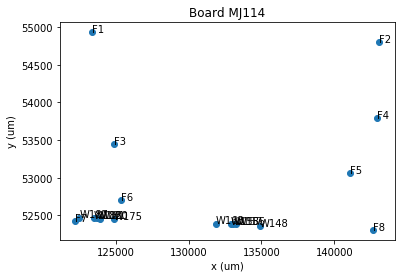

In [7]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(xvals_mj114,yvals_mj114,'o')
for x,y,label in list(zip(xvals_mj114,yvals_mj114,boards['MJ114'].keys())):
    ax.annotate(label,(x,y))
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Board MJ114')
plt.show()

Now let's plot the coordinates for two boards: *MJ114* and *MJ115*.

[]

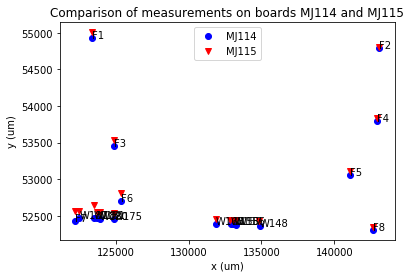

In [8]:
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
markers = list(Line2D.markers.keys())
colors = list(mcolors.BASE_COLORS.keys())

(xvals_mj115,yvals_mj115) = get_board_x_y_coords('MJ115')
fig,ax = plt.subplots()
ax.plot(xvals_mj114,yvals_mj114,markers[2]+colors[0],label='MJ114')
ax.plot(xvals_mj115,yvals_mj115,markers[3]+colors[2],label='MJ115')
for x,y,label in list(zip(xvals_mj114,yvals_mj114,boards['MJ114'].keys())):
    ax.annotate(label,(x,y))
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Comparison of measurements on boards MJ114 and MJ115')
plt.legend(loc='upper center')
ax.plot()

Let's dump the (x,y) coordinate for measurement *F1* for each board.

In [9]:
meas = 'F1'
for key,value in boards.items():
    (x,y) = boards[key][meas]
    print('{}, {}: ({},{})'.format(key,meas,x,y))

MJ114, F1: (123374,54930)
MJ115, F1: (123374,55008)
MJ116, F1: (123432,54980)
MJ137, F1: (123392,55048)
MJ138, F1: (123430,55018)
MJ139, F1: (123510,55010)
MJ140, F1: (123482,54978)
MJ150, F1: (123372,54946)
MJ151, F1: (123446,55000)


When comparing measurements between two boards, we should be careful that the origin may not be the same.  This doesn't matter for comparing distances between two points on the same board across all of the boards, but it does for comparing absolute coordinates.  We can establish a common coordinate system by transforming the coordinates for each board such that *F1* is the origin, i.e. (X,Y) --> (X-X_F1,Y-Y_F1), where (X_F1,Y_F1) are the coordinates *F1* for this board. You can't tell from the plots, but the source of data has a different convention for the positive y-direction than we're using, so let's also invert the y-coordinates, i.e. Y --> -Y.

In [10]:
for board in boards.keys():
    current_f1 = boards[board]['F1']
    print('current_f1: ({},{})'.format(current_f1[0],current_f1[1]))
    for meas in boards[board].keys():
        boards[board][meas] = boards[board][meas]-current_f1
        boards[board][meas] = boards[board][meas]*[1,-1]        

current_f1: (123374,54930)
current_f1: (123374,55008)
current_f1: (123432,54980)
current_f1: (123392,55048)
current_f1: (123430,55018)
current_f1: (123510,55010)
current_f1: (123482,54978)
current_f1: (123372,54946)
current_f1: (123446,55000)


Let's dump the (x,y) coordinate for measurement *F1* for each board again.

In [11]:
meas = 'F1'
for key,value in boards.items():
    (x,y) = boards[key][meas]
    print('{}, {}: ({},{})'.format(key,meas,x,y))

MJ114, F1: (0,0)
MJ115, F1: (0,0)
MJ116, F1: (0,0)
MJ137, F1: (0,0)
MJ138, F1: (0,0)
MJ139, F1: (0,0)
MJ140, F1: (0,0)
MJ150, F1: (0,0)
MJ151, F1: (0,0)


And for measurement *W148*.

In [12]:
meas = 'W148'
for key,value in boards.items():
    (x,y) = boards[key][meas]
    print('{}, {}: ({},{})'.format(key,meas,x,y))

MJ114, W148: (11499,2573)
MJ115, W148: (11495,2579)
MJ116, W148: (11496,2576)
MJ137, W148: (11493,2597)
MJ138, W148: (11486,2619)
MJ139, W148: (11455,2659)
MJ140, W148: (11481,2553)
MJ150, W148: (11492,2478)
MJ151, W148: (11506,2597)


Let's plot the coordinates for boards *MJ114* and *MJ115* again.

[]

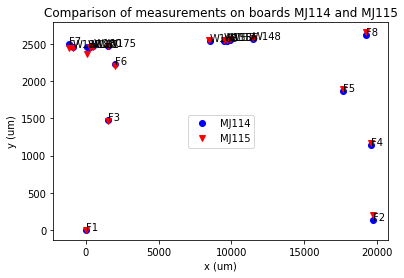

In [13]:
(xvals_mj114,yvals_mj114) = get_board_x_y_coords('MJ114')
(xvals_mj115,yvals_mj115) = get_board_x_y_coords('MJ115')
fig,ax = plt.subplots()
ax.plot(xvals_mj114,yvals_mj114,markers[2]+colors[0],label='MJ114')
ax.plot(xvals_mj115,yvals_mj115,markers[3]+colors[2],label='MJ115')
for x,y,label in list(zip(xvals_mj114,yvals_mj114,boards['MJ114'].keys())):
    ax.annotate(label,(x,y))
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title('Comparison of measurements on boards MJ114 and MJ115')
plt.legend(loc='center')
ax.plot()

From the figure it looks as though any differences are small.  That's good.  Let's print all of the measurements for the two boards side-by-side to see what differences there are.

In [14]:
print('{}\t\t{}\t\t\t{}'.format('Measurement','MJ114','MJ115'))
for index,meas in enumerate(boards['MJ114'].keys()):
    sep = '\t\t\t' if index == 0 else '\t\t'
    print('{}\t\t\t({},{})'.format(meas,xvals_mj114[index],yvals_mj114[index])+sep+'({},{})'.format(xvals_mj115[index],yvals_mj115[index]))

Measurement		MJ114			MJ115
F1			(0,0)			(0,0)
F2			(19730,136)		(19728,202)
F3			(1527,1482)		(1531,1468)
F4			(19574,1138)		(19574,1170)
F5			(17700,1872)		(17696,1890)
F6			(2010,2226)		(2014,2202)
F7			(-1169,2506)		(-1167,2444)
F8			(19264,2622)		(19262,2660)
W148			(11499,2573)		(11495,2579)
W156			(9903,2550)		(9898,2564)
W157			(9705,2548)		(9702,2561)
W158			(9507,2547)		(9498,2561)
W163			(8506,2539)		(8501,2550)
W175			(1515,2475)		(1510,2470)
W180			(516,2472)		(511,2460)
W181			(319,2462)		(315,2459)
W182			(117,2463)		(113,2361)
W187			(-880,2459)		(-885,2442)


So indeed there are some small differences, but nothing too different. We're primarily interested in measurements whose labels begin with *W*.  For each measurement whose label begins with a *W*, let's plot separately the x- and y-coordinate of that measurements for each board.

In [15]:
measurements = {}
mlabels = boards['MJ114'].keys()
for label in mlabels:
    xvals = np.asarray([boards[board][label][0] for board in boards.keys()])
    yvals = np.asarray([boards[board][label][1] for board in boards.keys()])
    measurements[label] = (xvals,yvals)

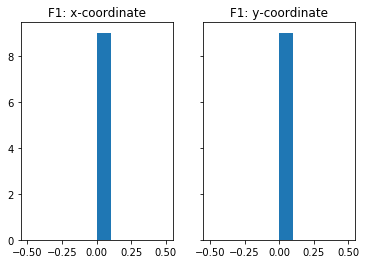

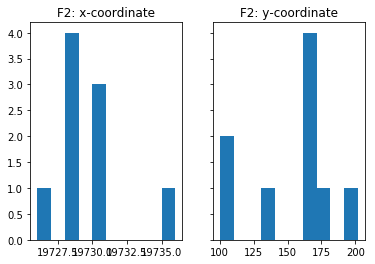

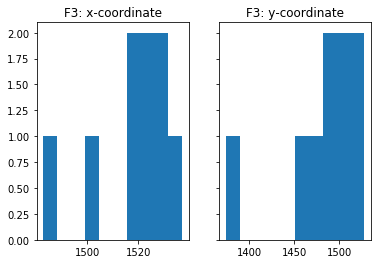

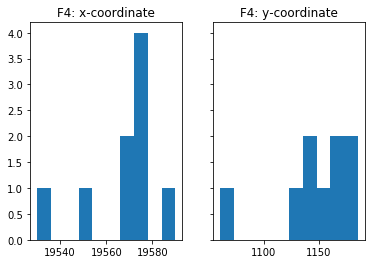

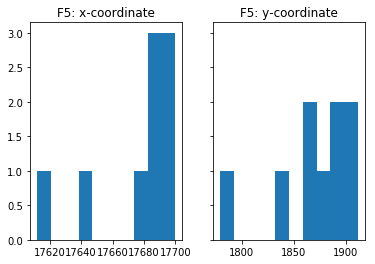

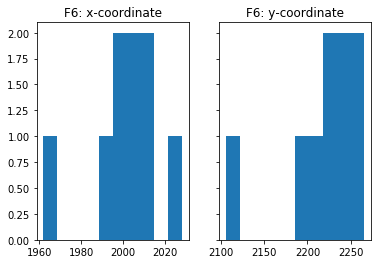

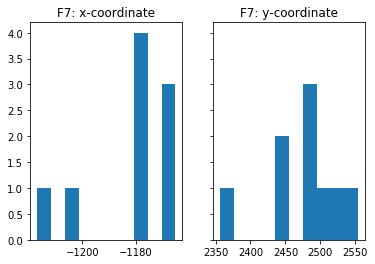

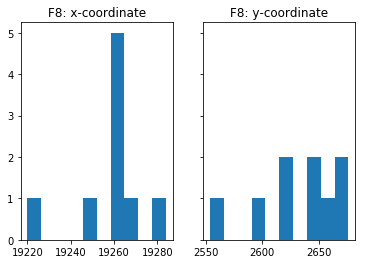

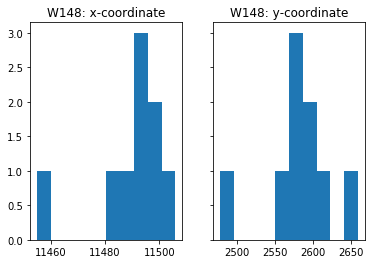

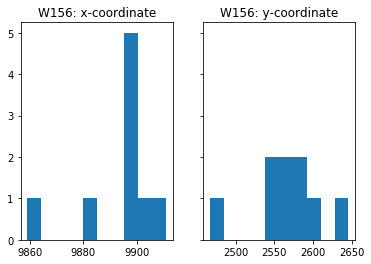

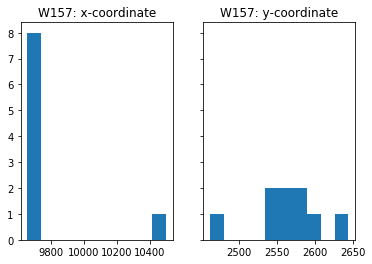

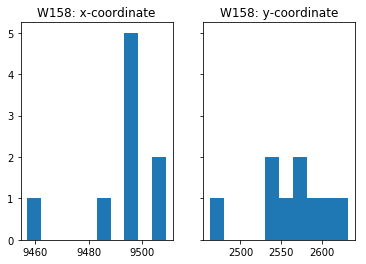

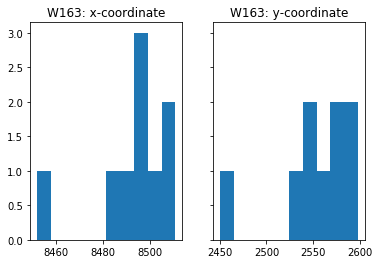

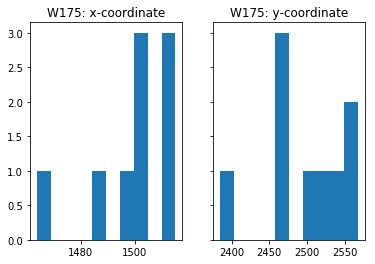

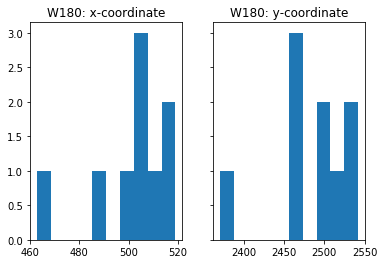

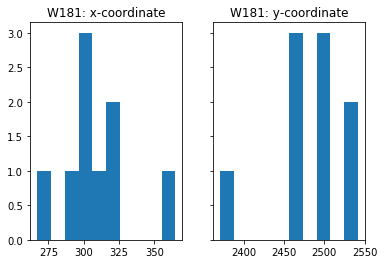

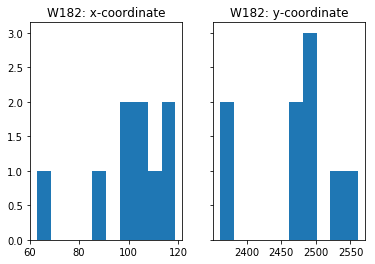

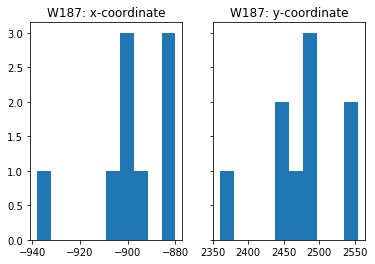

In [16]:
for label in mlabels:
    f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
    n1, bins1, patches1 = ax1.hist(measurements[label][0])
    ax1.set_title(label+': x-coordinate')
    n2, bins2, patches2 = ax2.hist(measurements[label][1])
    ax2.set_title(label+': y-coordinate')
    plt.show()